## MODEL configuration

In [1]:
import tensorflow as tf 
import numpy as np

In [17]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train /x_train.max()
x_test = x_test / x_test.max()

In [3]:
## 초기화 작업

dense = tf.keras.layers.Dense(256, activation='relu')

dense.get_config()['kernel_initializer']
## 시드값이 none으로 초기화 된다. 

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [5]:
## he normal 초기화 

dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer'] ## 초기화가 중요하다는 논문이있다. 

{'class_name': 'HeNormal', 'config': {'seed': None}}

## 초기화에 관한 
- glorot 초기화 : s자 곡선함수(sigmoid, tanh)를 activation function으로쓸 때 효과가 좋을 수 있다. 
- he initialization : Relu함수를 activation func으로 사용하는 경우 효과가 좋을 수 있다. 


In [ ]:
## 초기화가 분석에 영향이 있을 수 있다. 
## 양이 많아지면서, training을 하는데 있어, 문제가 있을 수 있다. 
## 개념적으로 봤을 때, cost function을 줄이는데(예를들면 경사하강) 좋은 영향을 줄 수 있다. 

In [2]:
## 규제에 대한 것을 하나 보도록 합시다. 
## L1, L2 규제에 대한 내용 

## 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

## 'kernel_regularizer': None, -> 규제가 정해져 있지 않음. 규제를 만들어보자 

{'name': 'dense',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [4]:
## L1 규제

dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer']) ## 규제가 L1으로 잡힌것을 확인할 수 있다. 

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}


In [5]:
## 세부적으로 조정이 필요한 경우, 파라미터를 넣을 수 있다. 
regularizer = tf.keras.regularizers.l1(l1 = 0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


In [ ]:
## kernel_regularizer에 규제를 적용할 수 있다. 

### L1 규제 : 가중치의 절대값에 비례하는 비용이 추가된다.(가중치의 L1 norm을 추가한다.) -> 절대값이다보니, 0이되는 경우가 있다.
## L2 규제 : 가중치의 제곱에 비례하는 비용이 추가된다.(L2 norm을 추가) -> 제곱값이다보니, 0이 되는 경우가 없다. 

## L1 : sparse feature에 대해 모델을 구성하는데 적합하다. sparse feature란? 예를들면 유저 아이디나 날짜 시간 데이터 같은 것이다. 
## L1 : 날짜나 유저 아이디는 겹치는 것이 많지 않을 것이고 대부분 고유한 값을 가질 것이다. sparse data : 희소 데이터

## L2 : 가중치값을 이용하여, 튀는 값에 대해 대응할 수 있다. 이상치나 노이즈가 있는 데이터에 학습할 때 좋다. (선형모델의 일반화에 좋다)



## w, b가 최적화가 되었는데, Loss가 0이다. - > acc 100 인 상태인데, 과적합이라고 볼 수 있다. cost가 0인 경우를 막기 위해 규제가 필요한 것이다. 
## 이상값이 많은 것에 대해 덜 반영되게 하는 것이 L2라고 볼 수 있다. 

In [ ]:
## DropOut 
## 연결 된 뉴런 간에 일부 연결을 끊어버린다.(이것 또한 과적합 방지를 위해서 한다. L1, L2 규제와 유사)
## Dropout 25%비율 적용해보자(25%의 노드각 삭제)

tf.keras.layers.Dropout(0.25)

## 많이 쓰이고 있다. 
## 개념적으로 L1, L2나 dropout은 일부로 정확도를 낮추는 방법이다. 

In [8]:
## 배치 정규화 

model_a = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(32, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_b = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64),
                                ## 배치 정규화 
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Activation('relu'),
                                tf.keras.layers.Dense(32),
                                ## 배치 정규화
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Activation('relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax'),
])
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)               

In [12]:
model_c = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64),
                                ## 배치 정규화 
                                tf.keras.layers.BatchNormalization(),
                                ## LeakyReLU alpha 0.2 적용
                                tf.keras.layers.LeakyReLU(alpha = 0.2),
                                tf.keras.layers.Dense(32),
                                ## 배치 정규화
                                tf.keras.layers.BatchNormalization(),
                                ## LeakyReLU alpha 0.2 적용
                                tf.keras.layers.LeakyReLU(alpha = 0.2),
                                tf.keras.layers.Dense(10, activation = 'softmax'),
])
model_c.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)               

In [13]:
model_a.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model_b.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_c.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history_a = model_a.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)
history_b = model_b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)
history_c = model_c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5209 - accuracy: 0.8475 - val_loss: 0.1720 - val_accuracy: 0.9467
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1504 - accuracy: 0.9548 - val_loss: 0.1336 - val_accuracy: 0.9588
Epoch 3/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1040 - accuracy: 0.9681 - val_loss: 0.1052 - val_accuracy: 0.9665
Epoch 1/3
1875/1875 [==============================] - 28s 14ms/step - loss: 0.5429 - accuracy: 0.8541 - val_loss: 0.1251 - val_accuracy: 0.9635
Epoch 2/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1463 - accuracy: 0.9556 - val_loss: 0.1068 - val_accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1052 - accuracy: 0.9679 - val_loss: 0.0868 - val_accuracy: 0.9721
Epoch 1/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5278 - accuracy: 0.8587 - val_loss: 0.1517 - val_accura

In [20]:
predictions_a = model_a.predict(x_test)
predictions_b = model_b.predict(x_test)
predictions_c = model_c.predict(x_test)

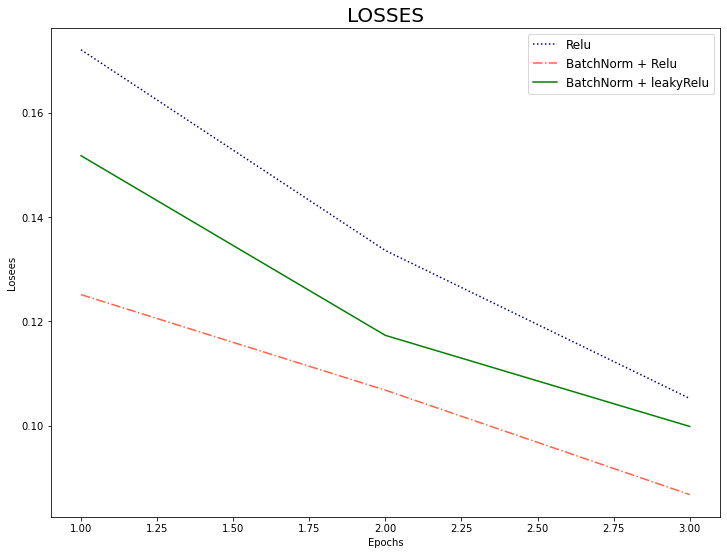

In [27]:
import numpy as np 

plt.figure(figsize = (12, 9 ))
plt.plot(np.arange(1, 4), history_a.history['val_loss'], color = 'navy', linestyle=':')
plt.plot(np.arange(1, 4), history_b.history['val_loss'], color = 'tomato', linestyle='-.')
plt.plot(np.arange(1, 4), history_c.history['val_loss'], color = 'green', linestyle='-')

plt.title('LOSSES', fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('Losees')
plt.legend(['Relu', 'BatchNorm + Relu', 'BatchNorm + leakyRelu'], fontsize = 12)

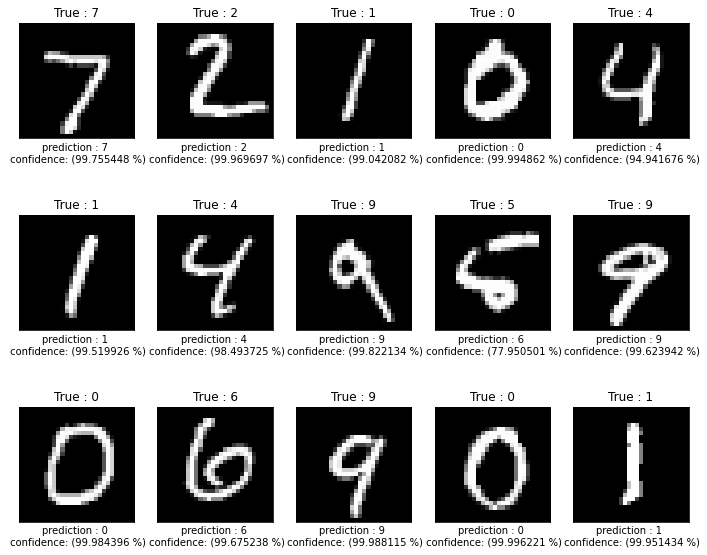

In [21]:
import matplotlib.pyplot as plt 

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions_a[idx]), 100 * np.max(predictions_a[idx])
    return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(img, cmap = 'gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True : {y_true}')
    ax.set_xlabel(f'prediction : {y_pred} \n confidence: ({confidence:2f} %)')

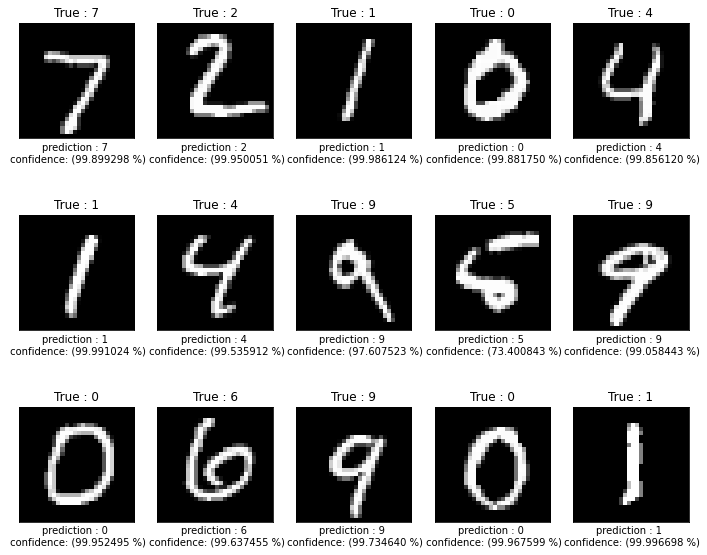

In [22]:
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions_b[idx]), 100 * np.max(predictions_b[idx])
    return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(img, cmap = 'gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True : {y_true}')
    ax.set_xlabel(f'prediction : {y_pred} \n confidence: ({confidence:2f} %)')

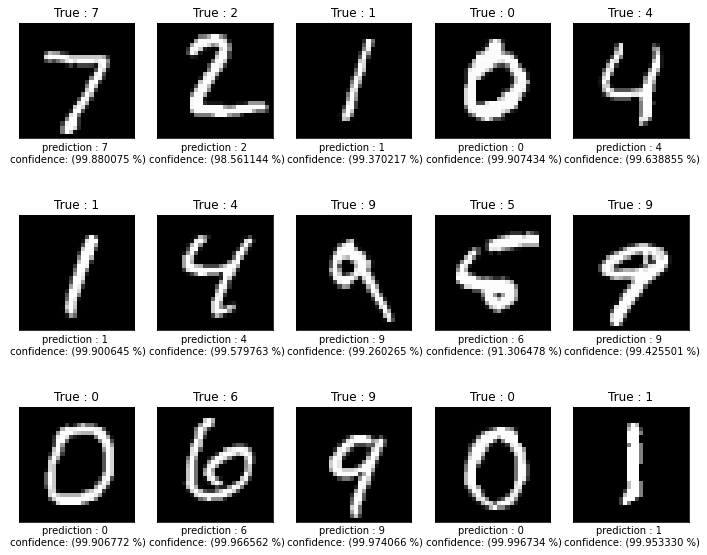

In [23]:
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions_c[idx]), 100 * np.max(predictions_c[idx])
    return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(img, cmap = 'gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True : {y_true}')
    ax.set_xlabel(f'prediction : {y_pred} \n confidence: ({confidence:2f} %)')

## Callback

In [29]:
## 중간에 터지면 안되지, 10만번째, 100만번째 등등에 저장하라 라는 callback함수를 알아보자. 

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(32, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
## 체크포인트 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./tmp_checkpoint.ckpt',
                                                save_weights_only = True,
                                                save_vest_only = True,
                                                monitor = 'val_loss',
                                                verbose = 1)


In [34]:
model.fit(x_train, y_train, 
        validation_data = (x_test, y_test),
        epochs = 5,
        callbacks = [checkpoint])

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5123 - accuracy: 0.8537 - val_loss: 0.1543 - val_accuracy: 0.9542

Epoch 00001: saving model to ./tmp_checkpoint.ckpt
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1430 - accuracy: 0.9580 - val_loss: 0.1259 - val_accuracy: 0.9599

Epoch 00002: saving model to ./tmp_checkpoint.ckpt
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0980 - accuracy: 0.9702 - val_loss: 0.1168 - val_accuracy: 0.9648

Epoch 00003: saving model to ./tmp_checkpoint.ckpt
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0749 - accuracy: 0.9758 - val_loss: 0.0950 - val_accuracy: 0.9719

Epoch 00004: saving model to ./tmp_checkpoint.ckpt
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.1078 - val_accuracy: 0.9653

Epoch 00005: saving model to ./tmp_checkpoint.ckpt


In [36]:
## 모델 체크 포인트 로드 전
loss, acc = model.evaluate(x_test, y_test)
print(f'체크포인트 로드 전 loss: {loss:.4f}, acc : {acc:.4f}')

## 체크포인트 로드
model.load_weights('tmp_checkpoint.ckpt')
loss, acc = model.evaluate(x_test, y_test)
print(f'체크포인트 로드 후 loss : {loss:.4f}, acc : {acc:.4f}')

313/313 [==============================] - 4s 12ms/step - loss: 0.1078 - accuracy: 0.9653
체크포인트 로드 전 loss: 0.1078, acc : 0.9653
313/313 [==============================] - 6s 18ms/step - loss: 0.1078 - accuracy: 0.9653
체크포인트 로드 후 loss : 0.1078, acc : 0.9653


In [37]:
## 조기 종료  ## 에폭을 오지게 돌려봤자 소용없으니깐, 중간에 멈추는 것


## 일단 초기화 실시
model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(32, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [38]:
## EarlyStopping 콜백 생성 

## 큰 변동이 없으면 멈춰라
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [39]:
model.fit(x_train, y_train, 
        validation_data = (x_test, y_test),
        epochs = 20,
        callbacks = [earlystopping])

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4980 - accuracy: 0.8543 - val_loss: 0.1535 - val_accuracy: 0.9515
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1404 - accuracy: 0.9592 - val_loss: 0.1366 - val_accuracy: 0.9578
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0943 - accuracy: 0.9713 - val_loss: 0.0940 - val_accuracy: 0.9713
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0776 - accuracy: 0.9762 - val_loss: 0.0946 - val_accuracy: 0.9714
Epoch 5/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0589 - accuracy: 0.9814 - val_loss: 0.0905 - val_accuracy: 0.9716
Epoch 6/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.1022 - val_accuracy: 0.9710
Epoch 7/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0892 - val

In [40]:
## 학습률 스케쥴러 

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(32, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])



In [41]:
# 콜백 객체 생성 및 스케쥴러 함수 적요 

def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
        #학습률 감소 적용
        return lr * tf.math.exp(-0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [46]:
model.fit(x_train, y_train, 
        validation_data = (x_test, y_test),
        epochs = 5,
        callbacks = [lr_scheduler])

Epoch 1/5
learning_rate: 0.01000
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1370 - accuracy: 0.9595 - val_loss: 0.1382 - val_accuracy: 0.9570
Epoch 2/5
learning_rate: 0.01000
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1240 - accuracy: 0.9633 - val_loss: 0.1309 - val_accuracy: 0.9602
Epoch 3/5
learning_rate: 0.01000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1263 - accuracy: 0.9626 - val_loss: 0.1292 - val_accuracy: 0.9605
Epoch 4/5
learning_rate: 0.01000
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1150 - accuracy: 0.9663 - val_loss: 0.1227 - val_accuracy: 0.9624
Epoch 5/5
learning_rate: 0.01000
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1068 - accuracy: 0.9677 - val_loss: 0.1192 - val_accuracy: 0.9644


In [43]:
model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
print('초기 학습률 확인 (0.01) : ', round(model.optimizer.lr.numpy(), 5) )

초기 학습률 확인 (0.01) :  0.01


In [47]:
print('다 돌고 학습률 확인 (초기 값은 0.01) : ', round(model.optimizer.lr.numpy(), 5) )

다 돌고 학습률 확인 (초기 값은 0.01) :  0.01


In [48]:
## 텐서 보드로 보기

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(32, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [49]:
## 텐서보드 저장 경로

log_dir = 'tensorboard'

## 텐서보드 콜백 정의 

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq=1)

In [50]:
model.fit(x_train, y_train, 
        validation_data = (x_test, y_test),
        epochs = 5,
        callbacks = [tensorboard])

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5067 - accuracy: 0.8536 - val_loss: 0.1503 - val_accuracy: 0.9549
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1462 - accuracy: 0.9556 - val_loss: 0.1293 - val_accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1011 - accuracy: 0.9697 - val_loss: 0.1252 - val_accuracy: 0.9603
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0766 - accuracy: 0.9761 - val_loss: 0.0955 - val_accuracy: 0.9709
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0649 - accuracy: 0.9807 - val_loss: 0.1051 - val_accuracy: 0.9680


In [51]:
%load_ext tensorboard

In [52]:
%tensorboard --logdir {log_dir}

In [55]:
model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(32, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, 
        validation_data = (x_test, y_test),
        epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4980 - accuracy: 0.8551 - val_loss: 0.1507 - val_accuracy: 0.9536
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1369 - accuracy: 0.9578 - val_loss: 0.1156 - val_accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0960 - accuracy: 0.9707 - val_loss: 0.0992 - val_accuracy: 0.9696
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0744 - accuracy: 0.9766 - val_loss: 0.0904 - val_accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0917 - val_accuracy: 0.9720


In [56]:
## 모델을 파일로 저장
model.save('model.h5')

In [57]:
## 저장된 모델 복원

h5_model = tf.keras.models.load_model('model.h5')
h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [59]:
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model loss : {loss:.5f}, acc : {acc:.5f}')

h5 model loss : 0.09167, acc : 0.97200


In [61]:
## 또 다른 모델 생성 방법

input_layer = tf.keras.Input(shape = (28, 28), name = 'inputlayer')
x1 = tf.keras.layers.Flatten(name = 'Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name = 'Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name = 'Dense2')(x2)
x4 = tf.keras.layers.Dense(32, activation='relu', name = 'Dense3')(x3)
x5 = tf.keras.layers.Dense(16, activation='softmax', name = 'OutputLayer')(x4)

In [64]:
model = tf.keras.Model(inputs = input_layer, outputs = x5, name = 'Model')
model.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (InputLayer)      [(None, 28, 28)]          0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 256)               200960    
_________________________________________________________________
Dense2 (Dense)               (None, 64)                16448     
_________________________________________________________________
Dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
OutputLayer (Dense)          (None, 16)                528       
Total params: 220,016
Trainable params: 220,016
Non-trainable params: 0
_______________________________________________________

In [68]:
from tensorflow.keras.utils import plot_model

In [72]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'mode.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [71]:
## 자동 미분 기능

## a, b의 Variable 생성
a = tf.Variable([1,2,3,4,5], dtype = tf.float32)
b = tf.Variable([10, 20, 30, 40, 50], dtype=tf.float32)

## 미분 계산이 가능한 객체인지 확인
print(f'a.trainable : {a.trainable}\nb.trainable : {b.trainable}')

a.trainable : True
b.trainable : True


In [73]:
# c = a * b
# c를 a에 대한 편미분 => b
# c를 b 대한 편미분 => a

with tf.GradientTape() as tape:
    c = a * b
grads = tape.gradient(c, [a, b])
tf.print(f'dc/da : {grads[0]}')
tf.print(f'dc/db : {grads[1]}')

dc/da : [10. 20. 30. 40. 50.]
dc/db : [1. 2. 3. 4. 5.]


In [74]:
# 단순선형회귀

x = tf.Variable(np.random.normal(size = (100,)), dtype= tf.float32)
y = 2 * x + 3
print(f'x[:5] : {x[:5].numpy()}\ny[:5] : {y[:5].numpy()}')

x[:5] : [-1.1071599   1.9805748   1.060507   -0.091384    0.58826226]
y[:5] : [0.7856803 6.9611497 5.121014  2.817232  4.1765246]


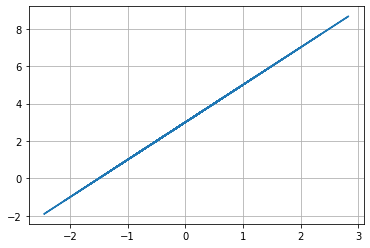

In [76]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(x.numpy(), y.numpy())
ax.grid()
plt.show()

In [84]:
learning_rate = 0.25

epochs = 100

w = tf.Variable(0.0)
b = tf.Variable(0.0)

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # y_hat 
        y_hat = w*x + b
        # cost 값(MSE로 확인)
        cost = tf.reduce_mean((y_hat - y) ** 2)

# 그래디언트 계산
    dw, db = tape.gradient(cost, [w, b])

# 그래디언트 업데이트
    w = tf.Variable(w - learning_rate * dw)
    b = tf.Variable(b - learning_rate * db)

    print(f'epoch : {epoch}, cost : {cost.numpy():.4f}, w : {w.numpy():.4f}, b : {b.numpy():.4f}')

    if cost.numpy() < 0.0005:
        break

epoch : 0, cost : 12.1614, w : 0.8292, b : 1.4741
epoch : 1, cost : 3.4257, w : 1.3176, b : 2.2219
epoch : 2, cost : 0.9822, w : 1.6037, b : 2.6021
epoch : 3, cost : 0.2865, w : 1.7705, b : 2.7959
epoch : 4, cost : 0.0849, w : 1.8675, b : 2.8950
epoch : 5, cost : 0.0256, w : 1.9236, b : 2.9458
epoch : 6, cost : 0.0078, w : 1.9561, b : 2.9719
epoch : 7, cost : 0.0024, w : 1.9748, b : 2.9854
epoch : 8, cost : 0.0007, w : 1.9855, b : 2.9924
epoch : 9, cost : 0.0002, w : 1.9917, b : 2.9960


In [111]:
## gradient tape model

model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(32, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')
])

# 손실함수
loss_func = tf.keras.losses.SparseCategoricalCrossentropy()

# 최적화 정의
optimizer = tf.keras.optimizers.Adam()

## 기록을 위한 Metric 정의
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_acc')
valid_loss = tf.keras.metrics.Mean(name = 'valid_loss')
valid_acc = tf.keras.metrics.SparseCategoricalAccuracy(name = 'valid_acc')

# 배치 생성 함수
def get_batches(x,y ,batch_size = 32):
    for i in range(int(x.shape[0] // batch_size)):
        x_batch = x[i * batch_size : (i + 1) * batch_size]
        y_batch = y[i * batch_size : (i + 1) * batch_size]
        yield(np.asarray(x_batch), np.asarray(y_batch))

In [113]:
@tf.function ## 데코레이션, 어노테이션
## 텐서 내부적으로 불러다 쓰는 함수 타입

def train_step(images, labels):
    # gradienttape 적용
    with tf.GradientTape() as tape:
        # 예측
        prediction = model(images, training = True)
        #손실
        loss = loss_func(labels, prediction)
    # 미분계산
    gradients = tape.gradient(loss, model.trainable_variables)
    # 옵티마이저 적용
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # loss, accutacy 계산
    train_loss(loss)
    train_acc(labels, prediction)


In [116]:
@tf.function

def valid_step(images, labels):
    # 예측
    prediction = model(images, training = False)
    # 손실
    loss = loss_func(labels, prediction)
    # loss acc 계산
    valid_loss(loss)
    valid_acc(labels, prediction)

In [118]:
# 초기화
train_loss.reset_states()
train_acc.reset_states()
valid_loss.reset_states()
valid_acc.reset_states()

for epoch in range(5):
    # 배치 별 순회
    for images, labels in get_batches(x_train, y_train):
        train_step(images, labels)
    for images, labels in get_batches(x_test, y_test):
        valid_step(images, labels)
    # 결과 출력
    metrics_template = 'epoch {}, loss {:.4f}, acc : {:.2f}, val_loss {:.4f}, val_acc : {:.2f}%'
    print(metrics_template.format(epoch+1, train_loss.result(), train_acc.result()*100, valid_loss.result(), valid_acc.result()*100))

epoch 1, loss 0.1044, acc : 96.84, val_loss 0.1191, val_acc : 96.30%
epoch 2, loss 0.0915, acc : 97.22, val_loss 0.1122, val_acc : 96.53%
epoch 3, loss 0.0815, acc : 97.52, val_loss 0.1080, val_acc : 96.69%
epoch 4, loss 0.0737, acc : 97.76, val_loss 0.1050, val_acc : 96.84%
epoch 5, loss 0.0671, acc : 97.97, val_loss 0.1038, val_acc : 96.91%
